# What Does Each Position Excel At?

This notebook is going to be taking a look at each individual position in Fifa and what attributes that position is most known for. It also would be interesting to see which attributes the position is least known for. By the end of the notebook a dataframe will be created that will show each position and the top 3 statistics for that position and the worst statistic for that position.

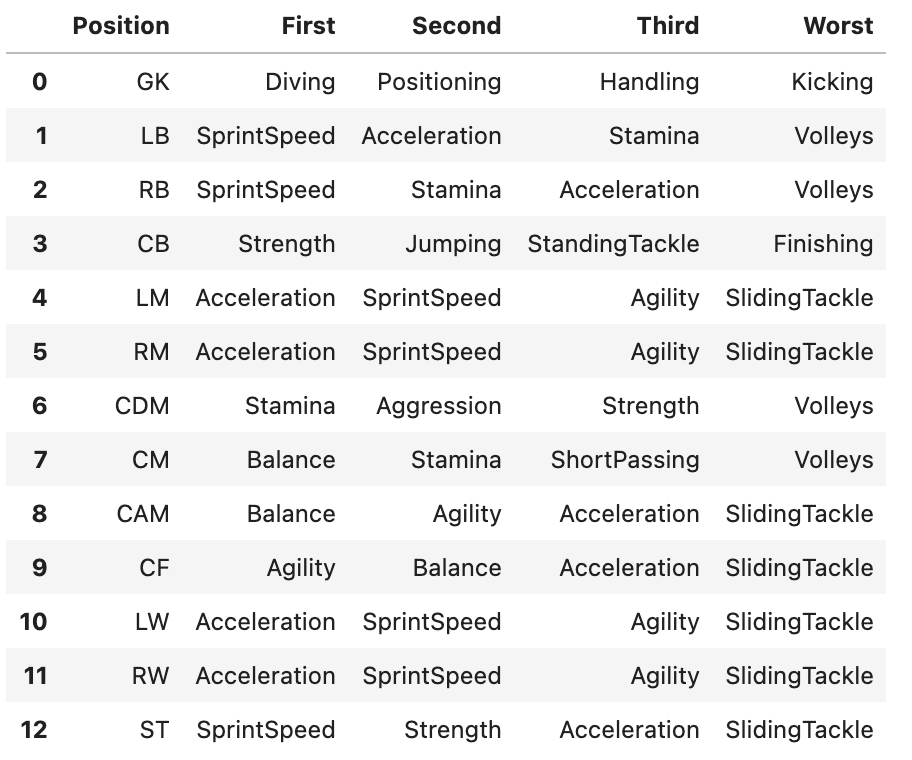

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


In [2]:
#Load in dataset
fifa = pd.read_csv('/kaggle/input/fifa19/data.csv')

In [3]:
#General information about the data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
#Quick look at the dataset
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#What does the Position column entries look like
fifa.Position.head()

0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
#Slicing fifa to only include the columns we need which are the positions and attributes
position_fifa = fifa.iloc[:, 21]
attributes_fifa = fifa.iloc[:,54:87]

sliced_fifa = pd.concat([position_fifa, attributes_fifa], axis=1, join="inner")

In [8]:
sliced_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         18147 non-null  object 
 1   Crossing         18159 non-null  float64
 2   Finishing        18159 non-null  float64
 3   HeadingAccuracy  18159 non-null  float64
 4   ShortPassing     18159 non-null  float64
 5   Volleys          18159 non-null  float64
 6   Dribbling        18159 non-null  float64
 7   Curve            18159 non-null  float64
 8   FKAccuracy       18159 non-null  float64
 9   LongPassing      18159 non-null  float64
 10  BallControl      18159 non-null  float64
 11  Acceleration     18159 non-null  float64
 12  SprintSpeed      18159 non-null  float64
 13  Agility          18159 non-null  float64
 14  Reactions        18159 non-null  float64
 15  Balance          18159 non-null  float64
 16  ShotPower        18159 non-null  float64
 17  Jumping     

In [9]:
#Check sliced_fifa to make sure dataset looks right
sliced_fifa.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0
1,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0
2,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0
3,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0
4,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0


We are able to verify this is right because the stats for Messi in the first row are exact with the fifa dataset.

In [10]:
#Make a new dataset 'goalkeepers'
goalkeepers = sliced_fifa[sliced_fifa.Position == 'GK']

In [11]:
#Quick look at the goalkeepers dataset
goalkeepers.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
3,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0
9,GK,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,...,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0
18,GK,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,...,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0
19,GK,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,...,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0
22,GK,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,...,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0


Now we have our dataset that will make it easier to analyze.

In [12]:
#Create function for quick results for averages of stats
def skill_selector(x):
    print(x.mean(axis=0).sort_values(ascending=False))

In [13]:
#Use function for goalkeeper average
skill_selector(goalkeepers)

GKDiving           65.323951
GKPositioning      63.047407
GKHandling         62.868148
GKKicking          61.477531
Strength           60.602963
Reactions          58.926420
Jumping            57.698272
Composure          45.122469
Balance            43.098272
Agility            40.201481
SprintSpeed        38.712099
Acceleration       38.320000
Vision             36.997531
Stamina            30.461728
ShortPassing       27.269136
Aggression         26.371852
LongPassing        25.808395
ShotPower          22.533333
Penalties          20.007407
BallControl        19.949630
Interceptions      17.052346
Marking            15.225185
Curve              14.707654
FKAccuracy         14.464198
HeadingAccuracy    14.368889
Crossing           14.257284
StandingTackle     14.141235
SlidingTackle      14.072099
Dribbling          13.856296
LongShots          12.653333
Volleys            12.397037
Finishing          12.016296
Positioning        11.258765
dtype: float64


We have found the answer for Goalkeepers. The best three stats for goalkeepers are:

* GKDiving
* GKPositioning
* GKHandling

The worst statistic for goalkeepers was:

* Positioning

These results are really interesting to look at. Going into the dataset it would not have been predicted that positioning would have been the lowest considering that is more of a mental attribute as opposed to a statistic like finishing or volleying.

# Field Players

Moving on we will now analyze the different positions on the field. For the sake of clarity within the dataset we will organize the field players into more common and general positions. These will be:

* LB  (LB and LWB)
* RB  (RB and RWB)
* CB  (LCB, CB, RCB)
* LM  (LM)
* RM  (RM)
* CDM (LDM, CDM, RDM)
* CM  (LCM, CM, RCM)
* CAM (LAM, CAM, RAM)
* CF  (CF)
* LW  (LW and LF)
* RW  (RW and RF)
* ST  (LS, ST, RS)


## Left Backs

In [14]:
#Making dataset for leftbacks
left_back_list = ['LB', 'LWB']
left_back = sliced_fifa[sliced_fifa['Position'].isin(left_back_list)]

In [15]:
#Info for lb dataset
left_back.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 35 to 18191
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         1400 non-null   object 
 1   Crossing         1400 non-null   float64
 2   Finishing        1400 non-null   float64
 3   HeadingAccuracy  1400 non-null   float64
 4   ShortPassing     1400 non-null   float64
 5   Volleys          1400 non-null   float64
 6   Dribbling        1400 non-null   float64
 7   Curve            1400 non-null   float64
 8   FKAccuracy       1400 non-null   float64
 9   LongPassing      1400 non-null   float64
 10  BallControl      1400 non-null   float64
 11  Acceleration     1400 non-null   float64
 12  SprintSpeed      1400 non-null   float64
 13  Agility          1400 non-null   float64
 14  Reactions        1400 non-null   float64
 15  Balance          1400 non-null   float64
 16  ShotPower        1400 non-null   float64
 17  Jumping     

In [16]:
#Quick look at data
left_back.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
35,LB,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,...,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0
49,LB,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,...,70.0,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0
64,LB,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,...,70.0,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0
85,LB,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,...,77.0,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0
106,LB,86.0,59.0,72.0,80.0,56.0,77.0,74.0,75.0,77.0,...,70.0,65.0,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0


In [17]:
#Use function for average stats for left_backs
skill_selector(left_back)

SprintSpeed        72.075714
Acceleration       72.020000
Stamina            71.645000
Balance            69.253571
Agility            68.360000
Jumping            67.680714
StandingTackle     65.473571
SlidingTackle      64.610714
Strength           64.348571
Crossing           63.467143
Aggression         63.462143
Interceptions      62.606429
Reactions          62.382143
BallControl        62.275714
Marking            62.240714
Dribbling          61.646429
ShortPassing       61.373571
Composure          58.208571
HeadingAccuracy    55.527857
LongPassing        55.420000
ShotPower          53.787143
Positioning        53.730000
Curve              52.762857
Vision             51.275714
Penalties          45.947143
LongShots          45.847857
FKAccuracy         45.713571
Finishing          40.077143
Volleys            39.396429
GKDiving           10.682857
GKPositioning      10.475000
GKKicking          10.427143
GKHandling         10.386429
dtype: float64


Here we have found that LBs have these three statistics as the highest average:

* SprintSpeed
* Acceleration
* Stamina

It is interesting to see that these are not technical skills, but all in the same general area of running not defending. For the worst statistic it is a little unentertaining to say that it is GKHandling because every outfield positions worst stat will be a GK stat so we will go to the worst outfield stat which is:

* Volleys


## Right Backs

In [18]:
#Make dataset for RBs
right_back_list = ['RB', 'RWB']
right_back = sliced_fifa[sliced_fifa['Position'].isin(right_back_list)]

In [19]:
#Double check RBs
right_back.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 69 to 18201
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         1378 non-null   object 
 1   Crossing         1378 non-null   float64
 2   Finishing        1378 non-null   float64
 3   HeadingAccuracy  1378 non-null   float64
 4   ShortPassing     1378 non-null   float64
 5   Volleys          1378 non-null   float64
 6   Dribbling        1378 non-null   float64
 7   Curve            1378 non-null   float64
 8   FKAccuracy       1378 non-null   float64
 9   LongPassing      1378 non-null   float64
 10  BallControl      1378 non-null   float64
 11  Acceleration     1378 non-null   float64
 12  SprintSpeed      1378 non-null   float64
 13  Agility          1378 non-null   float64
 14  Reactions        1378 non-null   float64
 15  Balance          1378 non-null   float64
 16  ShotPower        1378 non-null   float64
 17  Jumping     

In [20]:
#Use function for RBs
skill_selector(right_back)

SprintSpeed        72.629173
Stamina            72.521771
Acceleration       72.465167
Balance            69.004354
Jumping            68.317126
Agility            68.243106
StandingTackle     65.572569
Strength           64.969521
SlidingTackle      64.639332
Aggression         64.151669
Interceptions      62.888244
Marking            62.740203
Crossing           62.486938
Reactions          62.351959
BallControl        62.208999
ShortPassing       61.632801
Dribbling          61.249637
Composure          58.158926
HeadingAccuracy    55.935414
LongPassing        55.236575
Positioning        53.640784
ShotPower          52.513788
Vision             51.052250
Curve              49.740929
Penalties          45.118287
LongShots          44.367199
FKAccuracy         41.296081
Finishing          39.795356
Volleys            39.087083
GKHandling         10.699565
GKKicking          10.518868
GKDiving           10.492743
GKPositioning      10.458636
dtype: float64


There is a similar trend between the wingbacks as the highest three attributes for RBs were:

* SprintSpeed
* Stamina
* Acceleration

Stamina looks to be a little more common in RBs, but not by much. Also similarly the RBs worst attribute was:

* Volleys

## Center Backs

In [21]:
#Make CB dataset
center_back_list = ['LCB', 'CB', 'RCB']
center_back = sliced_fifa[sliced_fifa['Position'].isin(center_back_list)]

In [22]:
#Use function for CBs
skill_selector(center_back)

Strength           76.028497
Jumping            70.065415
StandingTackle     67.811528
Aggression         67.024611
HeadingAccuracy    65.841321
SlidingTackle      65.397992
Marking            65.222798
Interceptions      64.757772
Stamina            64.402202
Reactions          60.941062
SprintSpeed        58.716645
Composure          58.621114
ShortPassing       57.126295
Acceleration       56.918394
Balance            54.705635
BallControl        53.540155
Agility            53.022668
LongPassing        51.855570
ShotPower          49.820920
Dribbling          44.214702
Vision             41.696891
Penalties          41.611723
Crossing           40.599093
Curve              36.339054
Positioning        35.057642
FKAccuracy         34.700130
LongShots          34.645725
Volleys            32.414832
Finishing          30.695920
GKPositioning      10.616580
GKHandling         10.579663
GKKicking          10.570920
GKDiving           10.507448
dtype: float64


Interestingly tackling is not the highest statistic for CBs. The top three statistics for CBs were:

* Strength
* Jumping
* StandingTackle

The worst statistic for CBs was:

* Finishing

## LM

In [23]:
lm_list = ['LM']
lm_data = sliced_fifa[sliced_fifa['Position'].isin(lm_list)]

In [24]:
skill_selector(lm_data)

Acceleration       76.686758
SprintSpeed        75.818265
Agility            75.378082
Balance            74.114155
Dribbling          68.619178
BallControl        67.147032
Stamina            66.351598
ShortPassing       64.238356
ShotPower          64.062100
Crossing           62.719635
Jumping            62.277626
Positioning        62.079452
Reactions          61.253881
Vision             61.230137
Composure          60.457534
Finishing          59.407306
Curve              59.156164
LongShots          58.031050
Strength           58.023744
LongPassing        57.834703
Penalties          56.431963
Volleys            53.302283
FKAccuracy         52.791781
Aggression         50.802740
HeadingAccuracy    48.986301
Marking            40.880365
StandingTackle     39.208219
Interceptions      37.825571
SlidingTackle      37.089498
GKHandling         10.585388
GKKicking          10.496804
GKPositioning      10.462100
GKDiving           10.459361
dtype: float64


The top three for left midfielders were:

* Acceleration
* SprintSpeed
* Agility

While the worst was:

* SlidingTackle

## RM

In [25]:
rm_list = ['RM']
rm_data = sliced_fifa[sliced_fifa['Position'].isin(rm_list)]

In [26]:
skill_selector(rm_data)

Acceleration       76.818505
SprintSpeed        76.288256
Agility            74.927936
Balance            73.472420
Dribbling          68.168149
Stamina            66.807829
BallControl        66.764235
ShortPassing       63.814057
ShotPower          63.232206
Crossing           62.467082
Jumping            62.338078
Positioning        61.873665
Reactions          61.219751
Vision             60.735765
Composure          59.951068
Finishing          59.093416
Curve              58.109431
Strength           57.987544
LongPassing        57.282028
LongShots          57.258897
Penalties          56.072954
Volleys            53.073843
FKAccuracy         51.230427
Aggression         51.136121
HeadingAccuracy    49.268683
Marking            41.209075
StandingTackle     39.088078
Interceptions      38.074733
SlidingTackle      37.161032
GKHandling         10.619217
GKKicking          10.543594
GKPositioning      10.532918
GKDiving           10.516904
dtype: float64


Unsurprisingly the two positions have the same results:

* Acceleration
* SprintSpeed
* Agility

Worst:

* SlidingTackle

## CDM

In [27]:
cdm_list = ['LDM', 'CDM', 'RDM']
cdm_data = sliced_fifa[sliced_fifa['Position'].isin(cdm_list)]

In [28]:
skill_selector(cdm_data)

Stamina            71.720639
Aggression         68.817234
Strength           68.712300
ShortPassing       68.660876
Jumping            66.403753
Balance            66.102154
StandingTackle     65.906880
BallControl        65.722724
LongPassing        65.233495
Interceptions      64.961779
Agility            64.586518
Reactions          64.478110
Marking            63.508687
SlidingTackle      62.584434
Composure          62.521890
Acceleration       62.447533
ShotPower          62.292564
SprintSpeed        61.831828
Vision             60.950660
Dribbling          60.883947
HeadingAccuracy    57.618485
LongShots          54.509382
Crossing           53.755386
Positioning        52.993746
Curve              51.576095
Penalties          51.499653
FKAccuracy         49.867269
Finishing          46.642808
Volleys            45.069493
GKPositioning      10.686588
GKKicking          10.671994
GKHandling         10.660876
GKDiving           10.615010
dtype: float64


Stamina seems to be a statistic that is very common among positions:

* Stamina 
* Aggression
* Strength

Worst:

* Volleys

## CM

In [29]:
cm_list = ['LCM', 'CM', 'RCM']
cm_data = sliced_fifa[sliced_fifa['Position'].isin(cm_list)]

In [30]:
skill_selector(cm_data)

Balance            69.930275
Stamina            69.615596
ShortPassing       68.715596
Agility            68.314220
BallControl        66.653670
Acceleration       66.085321
LongPassing        65.346330
SprintSpeed        65.105963
Dribbling          63.994495
Vision             63.911468
Jumping            63.491743
ShotPower          63.254128
Reactions          63.237615
Strength           63.174771
Aggression         62.541284
Composure          62.155963
StandingTackle     58.800000
Positioning        58.451835
LongShots          57.774771
Interceptions      57.664679
Crossing           56.692661
Marking            56.543578
Curve              56.208716
SlidingTackle      55.637156
Penalties          53.428899
FKAccuracy         53.315138
HeadingAccuracy    52.919725
Finishing          51.931193
Volleys            49.722936
GKPositioning      10.570642
GKKicking          10.480275
GKDiving           10.478440
GKHandling         10.438073
dtype: float64


It looks like volleys are a struggle for a lot of positions:

* Balance
* Stamina
* ShortPassing

Worst:

* Volleys

## CAM

In [31]:
cam_list = ['LAM', 'CAM', 'RAM']
cam_data = sliced_fifa[sliced_fifa['Position'].isin(cam_list)]

In [32]:
skill_selector(cam_data)

Balance            73.374
Agility            72.836
Acceleration       70.828
SprintSpeed        69.086
BallControl        68.681
Dribbling          68.331
ShortPassing       67.695
Vision             66.170
ShotPower          63.817
Stamina            63.540
Composure          63.364
LongPassing        62.593
Reactions          62.408
Positioning        62.334
Curve              61.508
LongShots          60.383
Jumping            60.264
Crossing           60.061
Finishing          59.609
Penalties          58.400
FKAccuracy         58.300
Strength           56.429
Volleys            55.968
Aggression         51.529
HeadingAccuracy    49.153
StandingTackle     41.323
Marking            40.220
Interceptions      39.552
SlidingTackle      38.966
GKKicking          10.658
GKHandling         10.631
GKPositioning      10.456
GKDiving           10.332
dtype: float64


For CAMs:

* Balance 
* Agility
* Acceleration

Worst:

* SlidingTackle

## CF

In [33]:
cf_list = ['CF']
cf_data= sliced_fifa[sliced_fifa['Position'].isin(cf_list)]

In [34]:
skill_selector(cf_data)

Agility            74.608108
Balance            73.756757
Acceleration       73.324324
SprintSpeed        71.851351
Dribbling          68.675676
BallControl        67.837838
Finishing          64.608108
Jumping            64.391892
ShotPower          64.283784
Stamina            63.621622
Positioning        63.567568
ShortPassing       63.378378
Reactions          62.810811
Vision             62.702703
LongShots          61.148649
Composure          60.959459
Penalties          59.351351
Curve              59.229730
Volleys            58.864865
Strength           57.364865
Crossing           54.797297
LongPassing        54.202703
HeadingAccuracy    54.040541
FKAccuracy         52.797297
Aggression         48.878378
Marking            32.621622
StandingTackle     28.945946
Interceptions      28.378378
SlidingTackle      26.054054
GKPositioning       9.972973
GKKicking           9.945946
GKHandling          9.567568
GKDiving            9.432432
dtype: float64


For CFs:

* Agility 
* Balance
* Acceleration

Worst:

* SlidingTackle

## RW

In [35]:
rw_list = ['RW', 'RF']
rw_data = sliced_fifa[sliced_fifa['Position'].isin(rw_list)]

In [36]:
skill_selector(rw_data)

Acceleration       77.878238
SprintSpeed        76.886010
Agility            75.896373
Balance            74.225389
Dribbling          70.132124
BallControl        68.414508
ShotPower          65.896373
Stamina            64.847150
ShortPassing       64.145078
Positioning        63.709845
Finishing          62.691710
Crossing           62.370466
Vision             61.816062
Reactions          61.466321
Composure          61.295337
Jumping            59.808290
Curve              59.585492
LongShots          59.215026
Penalties          58.178756
Strength           56.111399
LongPassing        55.797927
Volleys            55.761658
FKAccuracy         52.204663
HeadingAccuracy    49.411917
Aggression         47.367876
Marking            35.930052
StandingTackle     33.145078
Interceptions      32.393782
SlidingTackle      31.308290
GKKicking          10.528497
GKHandling         10.520725
GKDiving           10.494819
GKPositioning      10.318653
dtype: float64


For RWs:

* Acceleration
* SprintSpeed
* Agility

Worst:

* SlidingTackle

## LW

In [37]:
lw_list = ['LW', 'LF']
lw_data = sliced_fifa[sliced_fifa['Position'].isin(lw_list)]

In [38]:
skill_selector(lw_data)

Acceleration       77.770202
SprintSpeed        76.659091
Agility            76.174242
Balance            74.045455
Dribbling          70.053030
BallControl        68.527778
ShotPower          65.368687
Stamina            64.126263
ShortPassing       63.542929
Positioning        63.285354
Finishing          62.111111
Crossing           61.611111
Vision             61.290404
Composure          61.199495
Reactions          61.095960
Jumping            60.055556
LongShots          59.641414
Curve              59.497475
Penalties          57.772727
Strength           56.845960
Volleys            55.734848
LongPassing        55.239899
FKAccuracy         51.795455
HeadingAccuracy    49.611111
Aggression         48.919192
Marking            35.833333
StandingTackle     34.007576
Interceptions      32.656566
SlidingTackle      31.969697
GKKicking          10.497475
GKDiving           10.452020
GKPositioning      10.378788
GKHandling         10.290404
dtype: float64


For LWs:

* Acceleration
* SprintSpeed
* Agility

Worst:

* SlidingTackle

## ST

In [39]:
st_list = ['LS', 'ST', 'RS']
st_data = sliced_fifa[sliced_fifa['Position'].isin(st_list)]

In [40]:
skill_selector(st_data)

SprintSpeed        70.169789
Strength           69.503513
Acceleration       69.135831
Jumping            68.300546
Finishing          66.957845
Agility            66.757221
ShotPower          66.640906
Positioning        65.796643
Stamina            64.440671
BallControl        64.400078
Balance            64.168618
HeadingAccuracy    63.505855
Dribbling          63.422326
Penalties          63.204918
Reactions          62.421936
Composure          60.689696
LongShots          59.857533
ShortPassing       58.426230
Volleys            58.282201
Vision             55.458236
Aggression         52.725995
Curve              51.679547
Crossing           47.219750
LongPassing        45.504294
FKAccuracy         44.612022
Marking            29.601093
Interceptions      26.624122
StandingTackle     25.748634
SlidingTackle      23.171351
GKKicking          10.612412
GKHandling         10.592506
GKPositioning      10.494536
GKDiving           10.457455
dtype: float64


Interesting to not see finishing in the top of the list:

* SprintSpeed
* Strength
* Acceleration

Worst:

* SlidingTackle

# Making the DataFrame

In [41]:
#Making dictionary for dataframe
d = {'Position': ['GK','LB', 'RB', 'CB', 'LM', 'RM', 'CDM', 'CM', 'CAM', 'CF', 'LW', 'RW', 'ST'],
     'First': ['Diving','SprintSpeed', 'SprintSpeed', 'Strength', 'Acceleration', 'Acceleration', 'Stamina', 'Balance', 'Balance', 'Agility', 'Acceleration', 'Acceleration', 'SprintSpeed'],
     'Second': ['Positioning','Acceleration', 'Stamina', 'Jumping', 'SprintSpeed', 'SprintSpeed', 'Aggression', 'Stamina', 'Agility', 'Balance', 'SprintSpeed', 'SprintSpeed', 'Strength'],
     'Third' : ['Handling','Stamina', 'Acceleration', 'StandingTackle', 'Agility', 'Agility', 'Strength', 'ShortPassing', 'Acceleration', 'Acceleration', 'Agility', 'Agility', 'Acceleration'],
     'Worst' : ['Kicking','Volleys', 'Volleys', 'Finishing', 'SlidingTackle', 'SlidingTackle', 'Volleys', 'Volleys', 'SlidingTackle', 'SlidingTackle', 'SlidingTackle', 'SlidingTackle', 'SlidingTackle']}

In [42]:
#Create dataframe
finished_product = pd.DataFrame(data=d)

In [43]:
#Now a look at the results
finished_product

,Position,First,Second,Third,Worst
0,GK,Diving,Positioning,Handling,Kicking
1,LB,SprintSpeed,Acceleration,Stamina,Volleys
2,RB,SprintSpeed,Stamina,Acceleration,Volleys
3,CB,Strength,Jumping,StandingTackle,Finishing
4,LM,Acceleration,SprintSpeed,Agility,SlidingTackle
5,RM,Acceleration,SprintSpeed,Agility,SlidingTackle
6,CDM,Stamina,Aggression,Strength,Volleys
7,CM,Balance,Stamina,ShortPassing,Volleys
8,CAM,Balance,Agility,Acceleration,SlidingTackle
9,CF,Agility,Balance,Acceleration,SlidingTackle


In [44]:
#Look through value counts of the columns
finished_product.First.value_counts()

Acceleration    4
SprintSpeed     3
Balance         2
Strength        1
Stamina         1
Diving          1
Agility         1
Name: First, dtype: int64

Out of the 12 positions we defined there are only 5 attributes that were the top. Acceleration accounted for 1/3 of the top attributes for positions.

In [45]:
finished_product.Second.value_counts()

SprintSpeed     4
Stamina         2
Acceleration    1
Strength        1
Balance         1
Jumping         1
Positioning     1
Aggression      1
Agility         1
Name: Second, dtype: int64

The second column is a little more diverse although most fall into the category of SprintSpeed.

In [46]:
finished_product.Third.value_counts()

Acceleration      4
Agility           4
Strength          1
Stamina           1
StandingTackle    1
Handling          1
ShortPassing      1
Name: Third, dtype: int64

Agility and Acceleration were very popular attributes for the First and Second columns and now they show a lot of relevance in the Third colun with 4 apperances each.

In [47]:
finished_product.Worst.value_counts()

SlidingTackle    7
Volleys          4
Finishing        1
Kicking          1
Name: Worst, dtype: int64

Interesting enough there are only 3 attributes that players were the worst at and they were all with either SlidingTackle and Volleys except one with Finishing which was CBs.